# Titles by Franchise

While examining the history of franchises from a temporal point of view is informative, titles form the perception and richness of a team's history. This notebook expands upon the temporal analysis done in `franchise_history.ipynb` to create visualizations focused on titles. Again, the work below leverages the `league` and `image` modules of the [py_ball](https://github.com/basketballrelativity/py_ball) package.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from py_ball import league, image

HEADERS = {'Connection': 'close',
           'Host': 'stats.nba.com',
           'Origin': 'http://stats.nba.com',
           'Upgrade-Insecure-Requests': '1',
           'Referer': 'stats.nba.com',
           'x-nba-stats-origin': 'stats',
           'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_2)' + \
                         'AppleWebKit/537.36 (KHTML, like Gecko) ' + \
                         'Chrome/66.0.3359.117 Safari/537.36'}

Note, the current implementation of `py_ball` does not have logos available for defunct teams. The visualizations below will not include logos, but those interested in plotting logos should see the relevant code in the [franchise_history.ipynb](https://github.com/basketballrelativity/franchise_history/blob/master/franchise_history.ipynb) notebook.

In [2]:
league_id = '10' #WNBA
franchises = league.League(headers=HEADERS,
                           endpoint='franchisehistory',
                           league_id=league_id)
franchise_df = pd.DataFrame(franchises.data['FranchiseHistory'])
franchise_df.head(10)

,CONF_TITLES,DIV_TITLES,END_YEAR,GAMES,LEAGUE_ID,LEAGUE_TITLES,LOSSES,PO_APPEARANCES,START_YEAR,TEAM_CITY,TEAM_ID,TEAM_NAME,WINS,WIN_PCT,YEARS
0,3,0,2018,374,10,0,191,8,2008,Atlanta,1611661330,Dream,183,0.489,11
1,1,0,2018,442,10,0,250,4,2006,Chicago,1611661329,Sky,192,0.434,13
2,2,0,2018,672,10,0,312,11,1999,Connecticut,1611661323,Sun,360,0.535,20
3,2,0,2018,544,10,0,244,10,2003,Connecticut,1611661323,Sun,300,0.551,16
4,0,0,2002,128,10,0,68,1,1999,Orlando,1611661323,Miracle,60,0.468,4
5,4,1,2018,702,10,3,391,11,1998,Dallas,1611661321,Wings,311,0.443,21
6,0,0,2018,102,10,0,60,2,2016,Dallas,1611661321,Wings,42,0.411,3
7,0,0,2015,204,10,0,145,1,2010,Tulsa,1611661321,Shock,59,0.289,6
8,4,1,2009,396,10,3,186,8,1998,Detroit,1611661321,Shock,210,0.530,12
9,3,0,2018,640,10,1,324,13,2000,Indiana,1611661325,Fever,316,0.493,19


In [3]:
defunct_df = pd.DataFrame(franchises.data['DefunctTeams'])
defunct_df.head(10)

,CONF_TITLES,DIV_TITLES,END_YEAR,GAMES,LEAGUE_ID,LEAGUE_TITLES,LOSSES,PO_APPEARANCES,START_YEAR,TEAM_CITY,TEAM_ID,TEAM_NAME,WINS,WIN_PCT,YEARS
0,0,0,2006,322,10,0,179,6,1997,Charlotte,1611661314,Sting,143,0.444,10
1,0,0,2003,220,10,0,112,4,1997,Cleveland,1611661315,Rockers,108,0.490,7
2,3,2,2008,390,10,3,149,9,1997,Houston,1611661316,Comets,241,0.617,12
3,2,0,2009,424,10,1,200,9,1997,Sacramento,1611661318,Monarchs,224,0.528,13
4,0,0,2002,96,10,0,48,1,2000,Miami,1611661326,Sol,48,0.500,3
5,0,0,2002,96,10,0,59,0,2000,Portland,1611661327,Fire,37,0.385,3


Because the `FranchiseHistory` and `DefunctTeams` table from the `franchisehistory` endpoint have the same schema, we can append one table to another to get a complete account of franchises in league history. First, we must extract the full franchise rows from `franchise_df` (note duplicate `TEAM_ID` values) and perform some data cleansing on both the active and defunct franchise DataFrames.

In [4]:
franchise_df['TEAM_FULL'] = franchise_df['TEAM_CITY'] + ' ' + \
                            franchise_df['TEAM_NAME']

franchise_ind = \
    franchise_df.groupby(['TEAM_ID'],
                         sort=False)['YEARS'].transform(max) == \
               franchise_df['YEARS']

franchise_df['YEARS'] = pd.to_numeric(franchise_df['YEARS'])
franchise_df['START_YEAR'] = pd.to_numeric(franchise_df['START_YEAR'])
franchise_df['END_YEAR'] = pd.to_numeric(franchise_df['END_YEAR'])

franchise_df['YEARS'] = franchise_df['END_YEAR'] - \
    franchise_df['START_YEAR']

unique_franchise_df = franchise_df[franchise_ind]

In [5]:
# Performing identical operations to the defunct_df DataFrame (This should ideally be written in a function)
defunct_df['TEAM_FULL'] = defunct_df['TEAM_CITY'] + ' ' + \
                            defunct_df['TEAM_NAME']

defunct_df['YEARS'] = pd.to_numeric(defunct_df['YEARS'])
defunct_df['START_YEAR'] = pd.to_numeric(defunct_df['START_YEAR'])
defunct_df['END_YEAR'] = pd.to_numeric(defunct_df['END_YEAR'])

defunct_df['YEARS'] = defunct_df['END_YEAR'] - \
    defunct_df['START_YEAR']

In [6]:
league_df = unique_franchise_df.append(defunct_df).reset_index(drop=True)
league_df.tail(20)

,CONF_TITLES,DIV_TITLES,END_YEAR,GAMES,LEAGUE_ID,LEAGUE_TITLES,LOSSES,PO_APPEARANCES,START_YEAR,TEAM_CITY,TEAM_ID,TEAM_NAME,WINS,WIN_PCT,YEARS,TEAM_FULL
0,3,0,2018,374,10,0,191,8,2008,Atlanta,1611661330,Dream,183,0.489,10,Atlanta Dream
1,1,0,2018,442,10,0,250,4,2006,Chicago,1611661329,Sky,192,0.434,12,Chicago Sky
2,2,0,2018,672,10,0,312,11,1999,Connecticut,1611661323,Sun,360,0.535,19,Connecticut Sun
3,4,1,2018,702,10,3,391,11,1998,Dallas,1611661321,Wings,311,0.443,20,Dallas Wings
4,3,0,2018,640,10,1,324,13,2000,Indiana,1611661325,Fever,316,0.493,18,Indiana Fever
5,1,0,2018,730,10,0,424,9,1997,Las Vegas,1611661319,Aces,305,0.417,21,Las Vegas Aces
6,4,2,2018,730,10,2,287,18,1997,Los Angeles,1611661320,Sparks,443,0.606,21,Los Angeles Sparks
7,6,0,2018,672,10,4,307,10,1999,Minnesota,1611661324,Lynx,365,0.543,19,Minnesota Lynx
8,3,0,2018,729,10,0,351,15,1997,New York,1611661313,Liberty,378,0.518,21,New York Liberty
9,4,0,2018,729,10,3,352,13,1997,Phoenix,1611661317,Mercury,377,0.517,21,Phoenix Mercury


Examining `league_df` confirms that we properly appended the defunct franchise DataFrame to the active franchise DataFrame. This DataFrame will serve as the foundation for the title visualization below. The visualization will contain the two different types of merit contained in the DataFrame above (`PO_APPEARANCES`, and `LEAGUE_TITLES`). I have noticed inconsistencies with public records of the WNBA and the `CONF_TITLES` in the API. Also, prior to 1970, conference titles were referred to as division titles. Use caution when using these fields.

In addition to the above issues, the API seems to be missing a `LEAGUE_TITLE` for the Houston Comets and the Los Angeles Sparks. Manual entry will need to suffice.

In [7]:
league_df['LEAGUE_TITLES'] = [titles if team_id not in [1611661316, 1611661320]
                              else titles + 1 for titles, team_id in zip(league_df['LEAGUE_TITLES'],
                                                                         league_df['TEAM_ID'])]

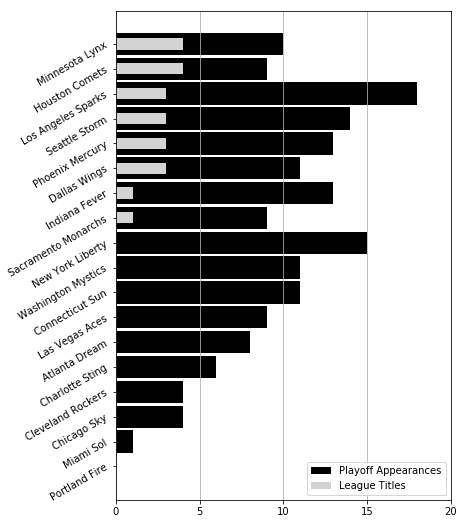

In [8]:
# Sorting the league DataFrame by titles in descending order of importance
league_df = league_df.sort_values(['LEAGUE_TITLES', 'PO_APPEARANCES'], ascending=True)

# A nested bar chart should provide a nice visual
bar_height_po = 0.9
bar_height_league = 0.45

# Adjusting the vertical locations of the horizontal bars to match with the axis tick labels
vert_locations = np.arange(len(league_df))
vert_locations = [x + bar_height_po/2 for x in vert_locations]

# Different figure sizes based on league
if league_id == '10':
    fig = plt.figure(figsize=(6, 9))
    ticks = 5
elif league_id == '00':
    fig = plt.figure(figsize=(6, 12))
    ticks = 5
elif league_id == '01':
    fig = plt.figure(figsize=(6, 10))
    ticks = 3

axis = fig.add_axes()

plt.barh(bottom=vert_locations,
        width=list(league_df['PO_APPEARANCES']), height=bar_height_po,
        color='black', label = 'Playoff Appearances')
plt.barh(bottom=vert_locations,
        width=list(league_df['LEAGUE_TITLES']), height=bar_height_league,
        color='lightgray', label = 'League Titles')

plt.xticks(range(0,
                 max(league_df['PO_APPEARANCES']) + 5,
                 ticks))
plt.yticks(vert_locations, list(league_df['TEAM_FULL']), rotation=30) # Adding team names
 
plt.gca().xaxis.grid(True)
plt.legend(loc='lower right')
plt.show()

The title and playoff history of WNBA franchises reveals some interesting structure in the league and the balance of power:
   - Both the Lynx and Comets were efficient with their playoff appearances, with each winning four titles in ten and nine playoff appearances, respectively.
   - The Sparks have been a near constant playoff presence, making the postseason in 18 out of 22 seasons.
   - The Liberty have made the postseason 15 times without winning a single title.
   - The Fire are the only team in WNBA history that failed to make the playoffs.

## Exploration
- Rerun the notebook after changing the `league_id` variable to '00' to visualize title history in the NBA (or '01' for the ABA!). What information can you glean from the NBA/ABA bar charts?
- How can you levereage the `franchisehistory` endpoint (or others) to enhance the title visualization?
- Titles and playoff appearances are not the only valid markers of franchise success. What other visualizations could you create to interpret franchise success differently.